In [50]:
## major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import joblib
import warnings
warnings.filterwarnings('ignore')

## sklearn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# detect outliers
from datasist.structdata import detect_outliers

## sklearn -- model selection
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
## sklearn -- metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

## sklearn --Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## sklearn -- 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### `Reading the Dataset and Look at the big picture`

In [2]:
df=pd.read_csv("covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
df["Cover_Type"].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [7]:
df.isna().sum().sort_values(ascending=False) 

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
df.duplicated().sum()

np.int64(0)

# EDA

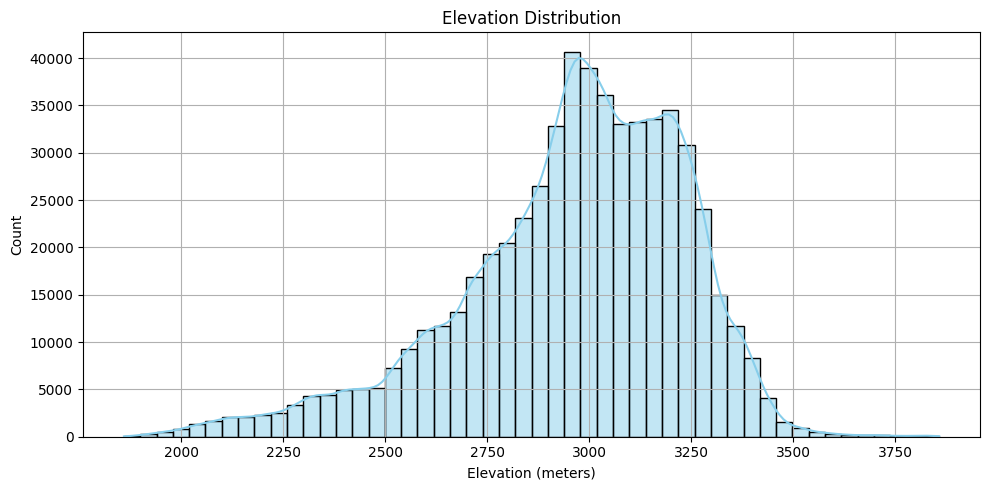

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Elevation', bins=50, kde=True, color='skyblue')
plt.title('Elevation Distribution')
plt.xlabel('Elevation (meters)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

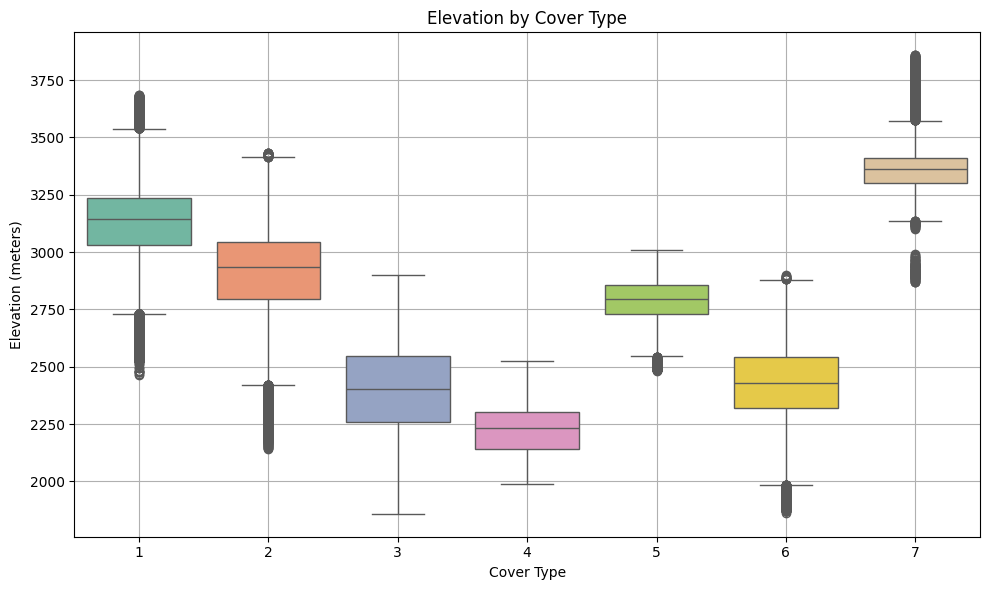

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cover_Type', y='Elevation', palette='Set2')
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation (meters)')
plt.grid(True)
plt.tight_layout()
plt.show()

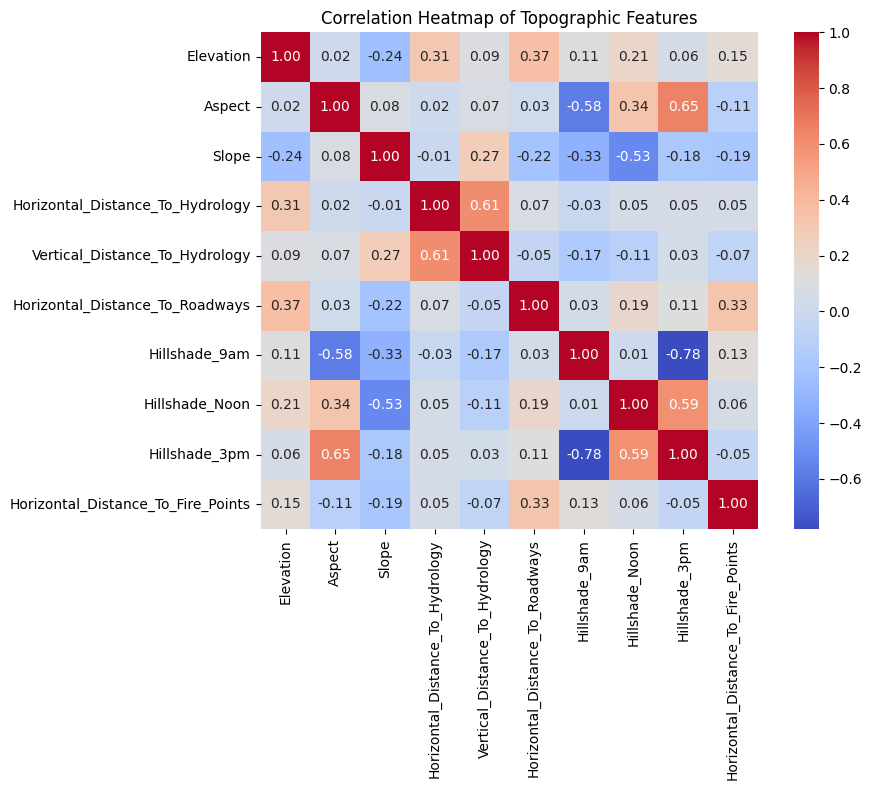

In [11]:
topo_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(10, 8))
corr_matrix = df[topo_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Topographic Features')
plt.tight_layout()
plt.show()

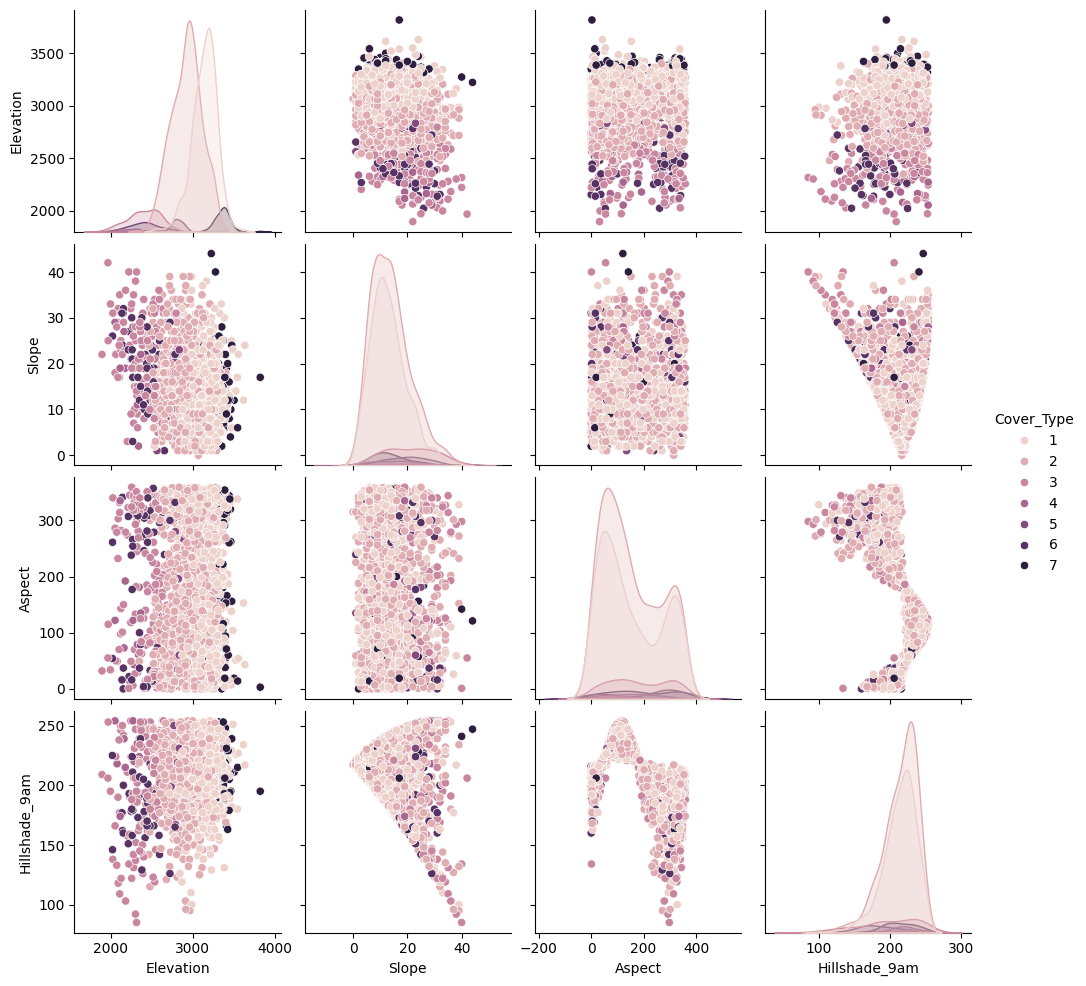

In [12]:
sns.pairplot(df.sample(2000)[['Elevation', 'Slope', 'Aspect', 'Hillshade_9am', 'Cover_Type']], hue='Cover_Type')

<Axes: xlabel='Cover_Type', ylabel='count'>

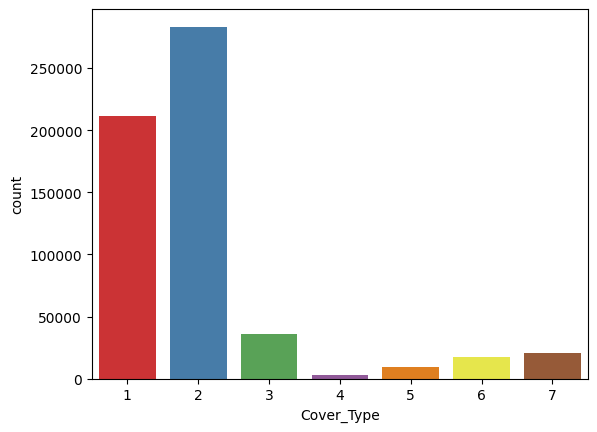

In [13]:
sns.countplot(data=df, x='Cover_Type', palette='Set1')

<Axes: xlabel='Cover_Type', ylabel='Slope'>

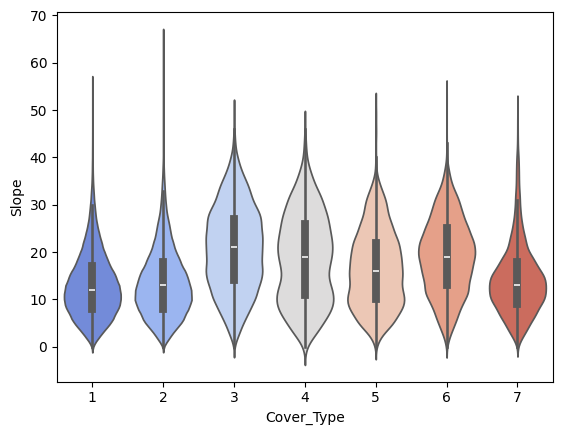

In [14]:
sns.violinplot(data=df, x='Cover_Type', y='Slope', palette='coolwarm')

# Spliting data 

In [15]:
## split to faetures and target
X = df.drop(columns=["Cover_Type"], axis=1)   ## faetures
y = df['Cover_Type']   ## traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (406708, 54)
y_train.shape 	 (406708,)
************************************************************
X_test.shape 	 (174304, 54)
y_test.shape 	 (174304,)


# Data preprocessing 

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-1.213285,1.521970,-1.215756,-0.985653,-0.709902,-0.962484,-0.229567,0.541278,0.614032,-0.199579,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
1,0.666947,-0.684312,-0.413945,-0.444373,0.182714,-0.831053,0.817019,-0.166989,-0.667745,-0.668463,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
2,0.178158,1.039625,-0.280310,1.447756,-0.229263,2.016207,-0.864994,0.996592,1.346476,-0.496589,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
3,-0.289224,0.512618,1.590582,-0.952706,-0.194931,0.389659,-0.939750,1.502497,1.241841,-0.500358,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
4,0.745438,-1.068401,-1.082121,-0.364357,-0.349423,0.473647,0.293726,0.136554,-0.013777,1.807877,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,0.795388,-0.764703,-0.146675,0.435797,-0.109103,0.411458,0.817019,-0.470532,-0.877015,1.774708,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
406704,0.759710,0.003476,1.991488,2.102000,4.199487,-0.766940,0.929153,0.237735,-1.164761,0.644713,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
406705,0.691921,1.173609,0.387866,0.308713,-0.091937,-0.674617,-1.537799,0.693049,1.634222,0.047678,...,-0.21506,3.167154,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
406706,0.377955,1.718481,0.922406,-0.684419,-0.469582,1.522537,-1.313531,-1.077617,0.430921,-1.023518,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222


In [18]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.398346,0.450092,1.724217,2.149068,1.332816,0.937826,-0.752860,1.451907,0.980254,0.218044,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,6.021743,-0.156417,-0.123222
1,-0.810123,-0.237696,-0.948486,-0.270222,-0.778565,-0.813101,0.704885,0.642459,-0.144571,-0.806414,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
2,-1.380972,-1.175589,-0.681215,-0.321996,-0.366588,-0.893242,0.144214,-0.065808,-0.013777,0.157737,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
3,-0.481886,-0.773635,-0.146675,0.694670,-0.126269,0.559559,0.779641,-0.470532,-0.850856,3.389417,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
4,-1.534387,-0.639650,-1.215756,-0.703246,-0.641239,-0.806690,0.555373,0.389507,-0.092253,2.262438,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174299,-0.449775,-0.023321,-0.814850,0.172217,0.045388,-0.207874,0.704885,0.895411,-0.013777,-0.446082,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
174300,0.524235,1.548767,1.323312,0.035720,-0.349423,0.958342,-2.135848,-1.027027,1.084889,-0.878782,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
174301,1.148600,0.834181,-1.349391,1.278312,1.212656,-1.133666,-0.042676,0.946002,0.718667,-0.963965,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222
174302,-0.082292,-0.764703,-0.948486,-0.637351,-0.727068,1.073745,0.592751,0.136554,-0.275364,2.223992,...,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.014458,-0.022566,-0.166065,-0.156417,-0.123222


In [19]:
y_train.value_counts()

Cover_Type
2    198223
1    148284
3     25116
7     14441
6     12140
5      6552
4      1952
Name: count, dtype: int64

In [20]:
y_test.value_counts()

Cover_Type
2    85078
1    63556
3    10638
7     6069
6     5227
5     2941
4      795
Name: count, dtype: int64

# Buliding Models

In [34]:
log_clf = LogisticRegression(penalty=None, max_iter=10000, multi_class='auto')
log_clf.fit(X_train, y_train)

## Predict 
y_pred_train_log = log_clf.predict(X_train)
y_pred_test_log = log_clf.predict(X_test)

## Evaluate
score_train_log = f1_score(y_train, y_pred_train_log,average='weighted')
score_test_log = f1_score(y_test, y_pred_test_log,average='weighted')

print(f'F1 Score for Training Dataset using Logisitic {score_train_log * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Logisitic {score_test_log * 100 :.3f}')

F1 Score for Training Dataset using Logisitic 71.599
F1 Score for Testing Dataset using Logisitic 71.346


<Axes: >

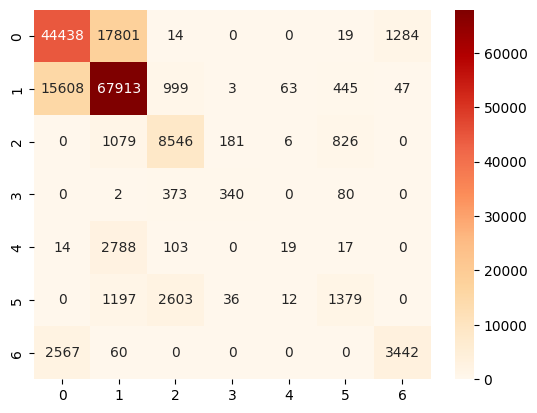

In [35]:
matrix = confusion_matrix(y_test, y_pred_test_log)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [36]:
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70     63556
           1       0.75      0.80      0.77     85078
           2       0.68      0.80      0.73     10638
           3       0.61      0.43      0.50       795
           4       0.19      0.01      0.01      2941
           5       0.50      0.26      0.35      5227
           6       0.72      0.57      0.63      6069

    accuracy                           0.72    174304
   macro avg       0.59      0.51      0.53    174304
weighted avg       0.71      0.72      0.71    174304



In [38]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='best', max_leaf_nodes=10)
tree_clf.fit(X_train, y_train) 

# Predict
y_pred_train_tree = tree_clf.predict(X_train)
y_pred_test_tree = tree_clf.predict(X_test)

## Evaluate
score_train_tree = f1_score(y_train, y_pred_train_tree,average='weighted')
score_test_tree = f1_score(y_test, y_pred_test_tree,average='weighted')

print(f'F1 Score for Training Dataset using Decision Trees {score_train_tree * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Decision Trees {score_test_tree * 100 :.3f}')

F1 Score for Training Dataset using Decision Trees 64.790
F1 Score for Testing Dataset using Decision Trees 64.682


<Axes: >

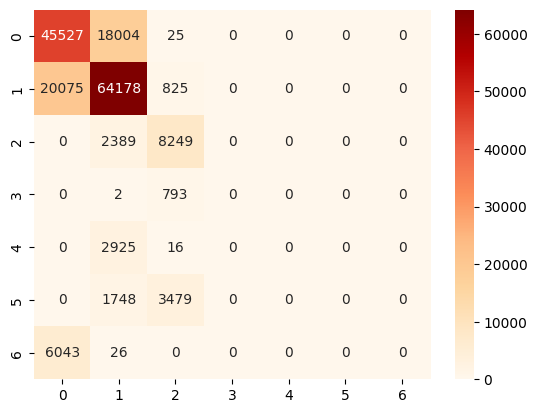

In [39]:
matrix = confusion_matrix(y_test, y_pred_test_tree)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [40]:
print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

           0       0.64      0.72      0.67     63556
           1       0.72      0.75      0.74     85078
           2       0.62      0.78      0.69     10638
           3       0.00      0.00      0.00       795
           4       0.00      0.00      0.00      2941
           5       0.00      0.00      0.00      5227
           6       0.00      0.00      0.00      6069

    accuracy                           0.68    174304
   macro avg       0.28      0.32      0.30    174304
weighted avg       0.62      0.68      0.65    174304



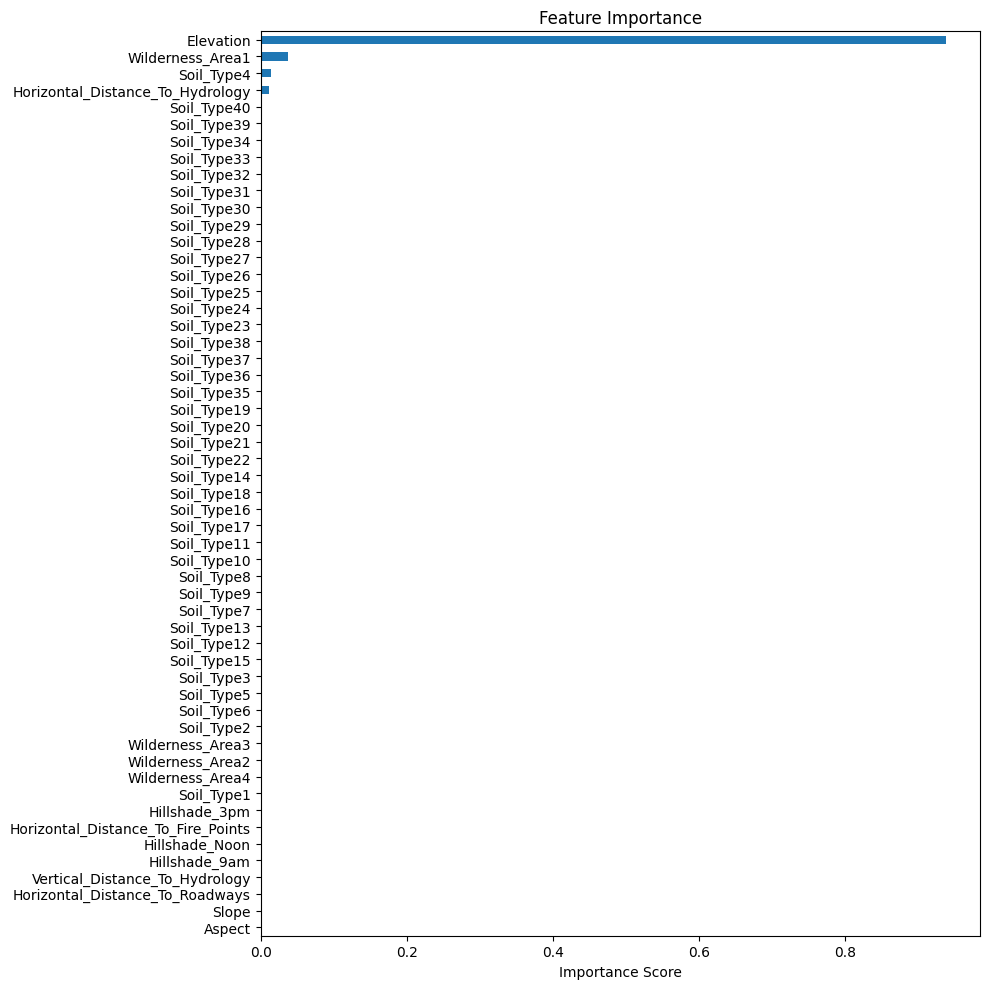

In [41]:
#feature importance scale
tree_clf_importance = pd.Series(tree_clf.feature_importances_, index=X.columns)
tree_clf_importance.sort_values().plot(kind='barh', title='Feature Importance', figsize=(10, 10))
plt.xlabel("Importance Score")
plt.tight_layout()

# Bonus

## Random Forest Model

In [21]:
forest_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 150],        
    'max_depth': [15, 20, None],        
    'min_samples_split': [5, 10],      
    'min_samples_leaf': [2, 4],         
    'max_features': ['sqrt']             
}
forest_clf.fit(X_train, y_train)

## Predict
y_pred_train_forest = forest_clf.predict(X_train)
y_pred_test_forest = forest_clf.predict(X_test)

## Evaluate
score_train_forest = f1_score(y_train, y_pred_train_forest,average='weighted')
score_test_forest = f1_score(y_test, y_pred_test_forest,average='weighted')

print(f'F1 Score for Training Dataset using RF {score_train_forest * 100 :.3f}')
print(f'F1 Score for Testing Dataset using RF {score_test_forest * 100 :.3f}')

F1 Score for Training Dataset using RF 100.000
F1 Score for Testing Dataset using RF 95.132


<Axes: >

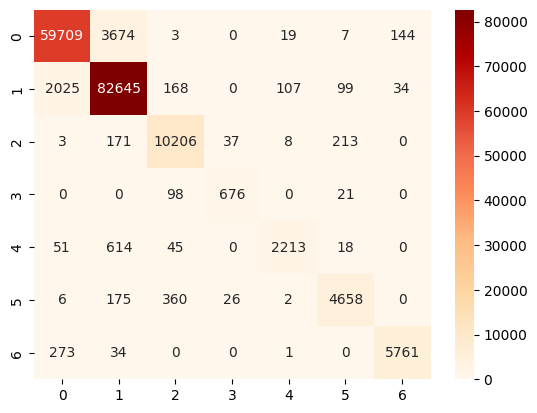

In [23]:
matrix = confusion_matrix(y_test, y_pred_test_forest)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [24]:
print(classification_report(y_test, y_pred_test_forest))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.75      0.84      2941
           6       0.93      0.89      0.91      5227
           7       0.97      0.95      0.96      6069

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



# RF Tunning

In [25]:
## Using GridSearchCV
rf_grid_model = GridSearchCV(
    forest_clf,
    param_grid,
    cv=3,             
    n_jobs=-1,        
    verbose=2         
)
rf_grid_model.fit(X_train,y_train)

y_pred_train_rf = rf_grid_model.predict(X_train)
y_pred_test_rf = rf_grid_model.predict(X_test)

score_train_rf = f1_score(y_train, y_pred_train_rf,average='weighted')
score_test_rf = f1_score(y_test, y_pred_test_rf,average='weighted')

print(f'F1 Score for Training Dataset using RF {score_train_rf * 100 :.3f}')
print(f'F1 Score for Testing Dataset using RF {score_test_rf * 100 :.3f}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
F1 Score for Training Dataset using RF 99.328
F1 Score for Testing Dataset using RF 94.499


In [26]:
rf_grid_model.best_score_

np.float64(0.9349951322823967)

In [27]:
rf_grid_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [28]:
## Model forest after tuning
forest_tuned = rf_grid_model.best_estimator_

## Cross validation 
y_pred_forest_tuned = cross_val_predict(estimator=forest_tuned, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

In [29]:
## Evaluate forest tuned using f1_score
f1_score(y_train, y_pred_forest_tuned,average='weighted')

0.9395981121723774

In [30]:
## Evaluate forest tuned using cross_val_score
cross_val_score(estimator=forest_tuned, X=X_train, y=y_train, cv=5, n_jobs=-1).mean()

np.float64(0.9401142838389223)

## XGBoost Model

In [31]:
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

In [43]:
xgb_clf = XGBClassifier(n_estimators=120, max_depth=5,colsample_bytree=0.8, subsample=0.9, reg_lambda=100, learning_rate=0.2)
xgb_clf.fit(X_train, y_train)

## Predict
y_pred_train_xgboost = xgb_clf.predict(X_train)
y_pred_test_xgboost = xgb_clf.predict(X_test)

## Evaluate
score_train_xgboost = f1_score(y_train, y_pred_train_xgboost,average='weighted')
score_test_xgboost = f1_score(y_test, y_pred_test_xgboost,average='weighted')

print(f'F1 Score for Training Dataset using XGBoost  {score_train_xgboost * 100 :.3f}')
print(f'F1 Score for Testing Dataset using XGBoost {score_test_xgboost * 100 :.3f}')

F1 Score for Training Dataset using XGBoost  81.569
F1 Score for Testing Dataset using XGBoost 80.972


<Axes: >

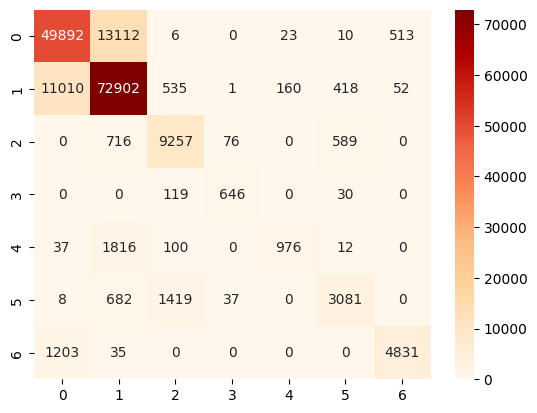

In [45]:
matrix = confusion_matrix(y_test, y_pred_test_xgboost)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [46]:
print(classification_report(y_test, y_pred_test_xgboost))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     63556
           1       0.82      0.86      0.84     85078
           2       0.81      0.87      0.84     10638
           3       0.85      0.81      0.83       795
           4       0.84      0.33      0.48      2941
           5       0.74      0.59      0.66      5227
           6       0.90      0.80      0.84      6069

    accuracy                           0.81    174304
   macro avg       0.82      0.72      0.75    174304
weighted avg       0.81      0.81      0.81    174304



## XGBoost Tunning

In [47]:
## Using GridSearchCV
xgb_grid_model = GridSearchCV(
    xgb_clf,
    param_grid,
    cv=3,             
    n_jobs=-1,        
    verbose=2         
)
xgb_grid_model.fit(X_train,y_train)

y_pred_train_xgb =xgb_grid_model.predict(X_train)
y_pred_test_xgb = xgb_grid_model.predict(X_test)

score_train_xgb = f1_score(y_train, y_pred_train_xgb,average='weighted')
score_test_xgb = f1_score(y_test, y_pred_test_xgb,average='weighted')

print(f'F1 Score for Training Dataset using xgb {score_train_xgb * 100 :.3f}')
print(f'F1 Score for Testing Dataset using xgb {score_test_xgb * 100 :.3f}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
F1 Score for Training Dataset using xgb 99.357
F1 Score for Testing Dataset using xgb 96.258


<Axes: >

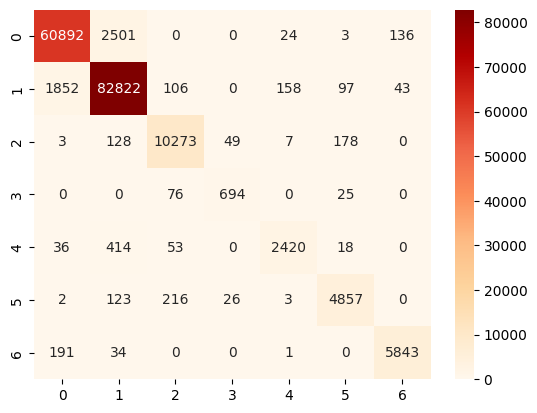

In [48]:
matrix = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [49]:
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     63556
           1       0.96      0.97      0.97     85078
           2       0.96      0.97      0.96     10638
           3       0.90      0.87      0.89       795
           4       0.93      0.82      0.87      2941
           5       0.94      0.93      0.93      5227
           6       0.97      0.96      0.97      6069

    accuracy                           0.96    174304
   macro avg       0.95      0.93      0.94    174304
weighted avg       0.96      0.96      0.96    174304



based on these results the Random Forest model is better than the XGBOOST in this task

In [51]:
joblib.dump(forest_clf, 'RF_model.pkl') 

['RF_model.pkl']